## Exercise 05 — Boxplot

Lag between first commits and lab deadlines for control vs. test groups.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_PATH = '../data/ab-test.csv'


In [25]:
df = pd.read_csv(DATA_PATH)
df.head()


,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [26]:
grouped = (
    df
    .groupby(['time', 'group'])
    ['diff']
    .apply(list)
)
grouped


time    group  
after   control    [-75.0, -81.5, -32.0, 17.5, -94.0, -49.0, -131...
        test       [-103.33333333333331, -10.0, -82.3333333333333...
before  control    [-103.0, -15.5, -3.0, -153.0, -202.0, -16.0, -...
        test       [-6.0, -3.5, -148.0, -112.5, -69.3333333333333...
Name: diff, dtype: object

In [27]:
groups = ['control', 'test']
times = ['after', 'before']

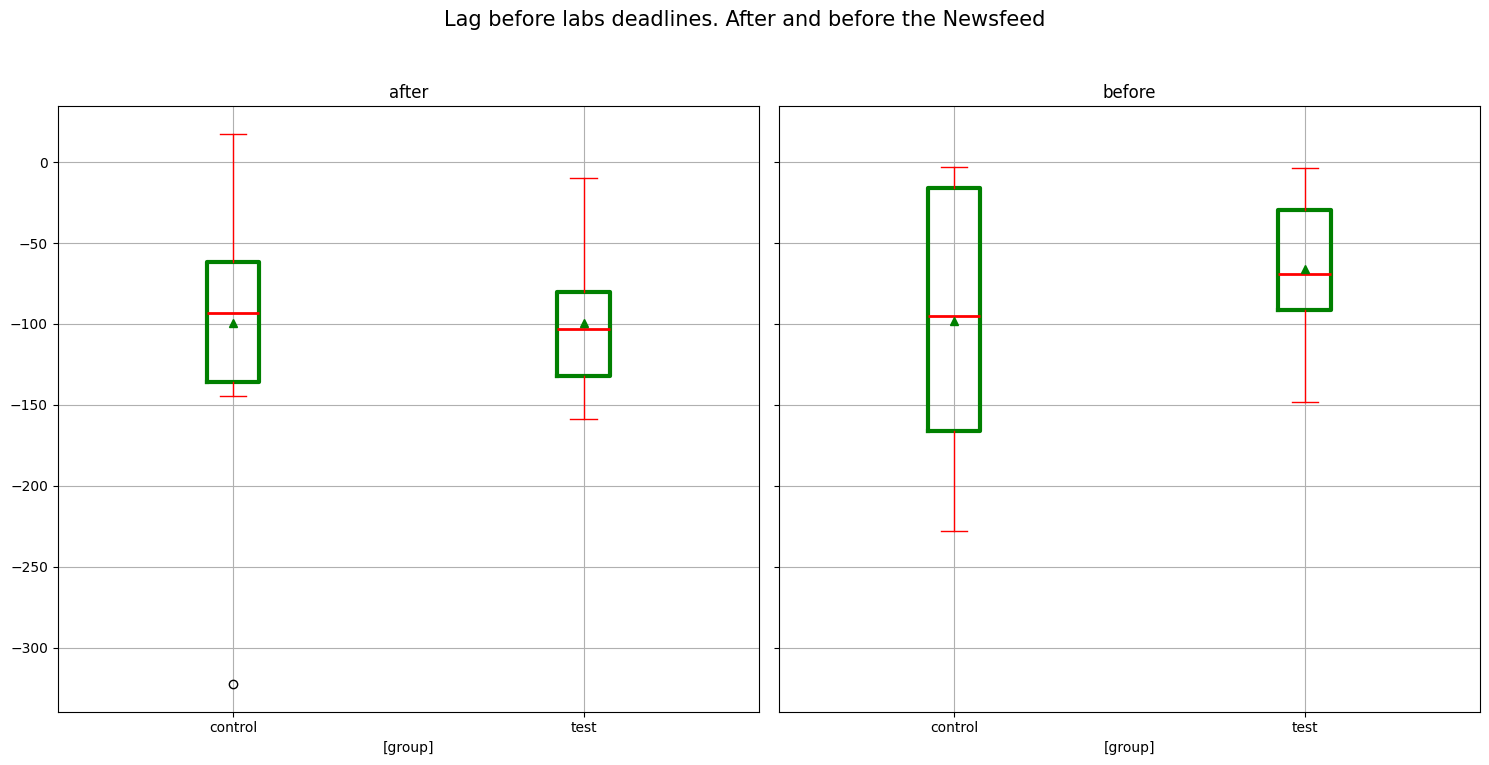

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('Lag before labs deadlines. After and before the Newsfeed', fontsize=15)

box_props = dict(linewidth=3, color='green')
median_props = dict(linewidth=2, color='red')
whisker_props = dict(color='red')
cap_props = dict(color='red')
mean_props = dict(marker='^', markerfacecolor='green', markeredgecolor='green')

for ax, time in zip(axes, times):
    data_to_plot = [
        df[(df['time'] == time) & (df['group'] == 'control')]['diff'],
        df[(df['time'] == time) & (df['group'] == 'test')]['diff']
    ]
    
    ax.boxplot(data_to_plot,
               tick_labels=groups,
               boxprops=box_props,
               medianprops=median_props,
               whiskerprops=whisker_props,
               capprops=cap_props,
               showmeans=True,
               meanprops=mean_props)
    
    ax.set_title(time)
    ax.set_xlabel('[group]')
    ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [29]:
control_before = df[(df['time'] == 'before') & (df['group'] == 'control')]['diff']
q1 = control_before.quantile(0.25)
q3 = control_before.quantile(0.75)
iqr = q3 - q1
rounded_iqr = round(iqr / 10) * 10

print(f"Calculated IQR: {iqr}")
print(f"Rounded IQR: {rounded_iqr}")


Calculated IQR: 150.0
Rounded IQR: 150


**What was the IQR of the control group before the newsfeed?**  
The answer is roughly 150 hours (rounded to the nearest 10).